# Setup

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data

In [16]:
datasets = ["arc130", "1138_bus", "bcsstk13", "darcy003", "af_1_k101"]
nnz = [1282, 2596, 42943, 1167685, 9027150]

cpu_means = [18.2, 36.8, 206.94, 5647.9, 35951.8]
cpu_sorted_means = [19.29, 38.1, 182.37, 5606.2, 37606.5]
gpu_means = [65.5, 67.4, 64.67, 273.84, 858.36]

cpu_stds =  [0.4, 0.4, 4.9, 21.31, 275.7]
cpu_sorted_stds = [0.46, 0.54, 3.23, 115.0, 345.9]
gpu_stds = [2.39, 3.8, 4.49, 11.5, 43.68]

cpu_o1_means = [4.09, 9.49, 94.1, 1697.2, 9866.3]
cpu_o1_stds = [0, 0.5, 7.88, 21.3, 41.3]
cpu_o1_sorted_means = [8, 9.59, 127.05, 1806.3, 16897.4]
cpu_o1_sorted_stds = [0, 0.49, 6.4, 11.6, 71.7]

cpu_o2_means = [3.56, 8.79, 70.06, 1723.1, 9800.1]
cpu_o2_stds = [0.49, 0.4, 6.25, 15.43, 61.8]
cpu_o2_sorted_means = [7.09, 9.69, 125.7, 1812.5, 17028.5]
cpu_o2_sorted_stds = [0.3, 0.46, 5.4, 17.12, 53.3]

cpu_o3_means = [4, 8.39, 95.7, 1742.8, 9750.6]
cpu_o3_sorted_means = [7.78, 10.69, 129.6, 1789.5, 16934.4]
cpu_o3_stds = [0, 0.49, 7.74, 19.1, 29.9]
cpu_o3_sorted_stds = [0.4, 0.46, 4.78, 20.1, 81.4]

# Chart CPU Optimizations

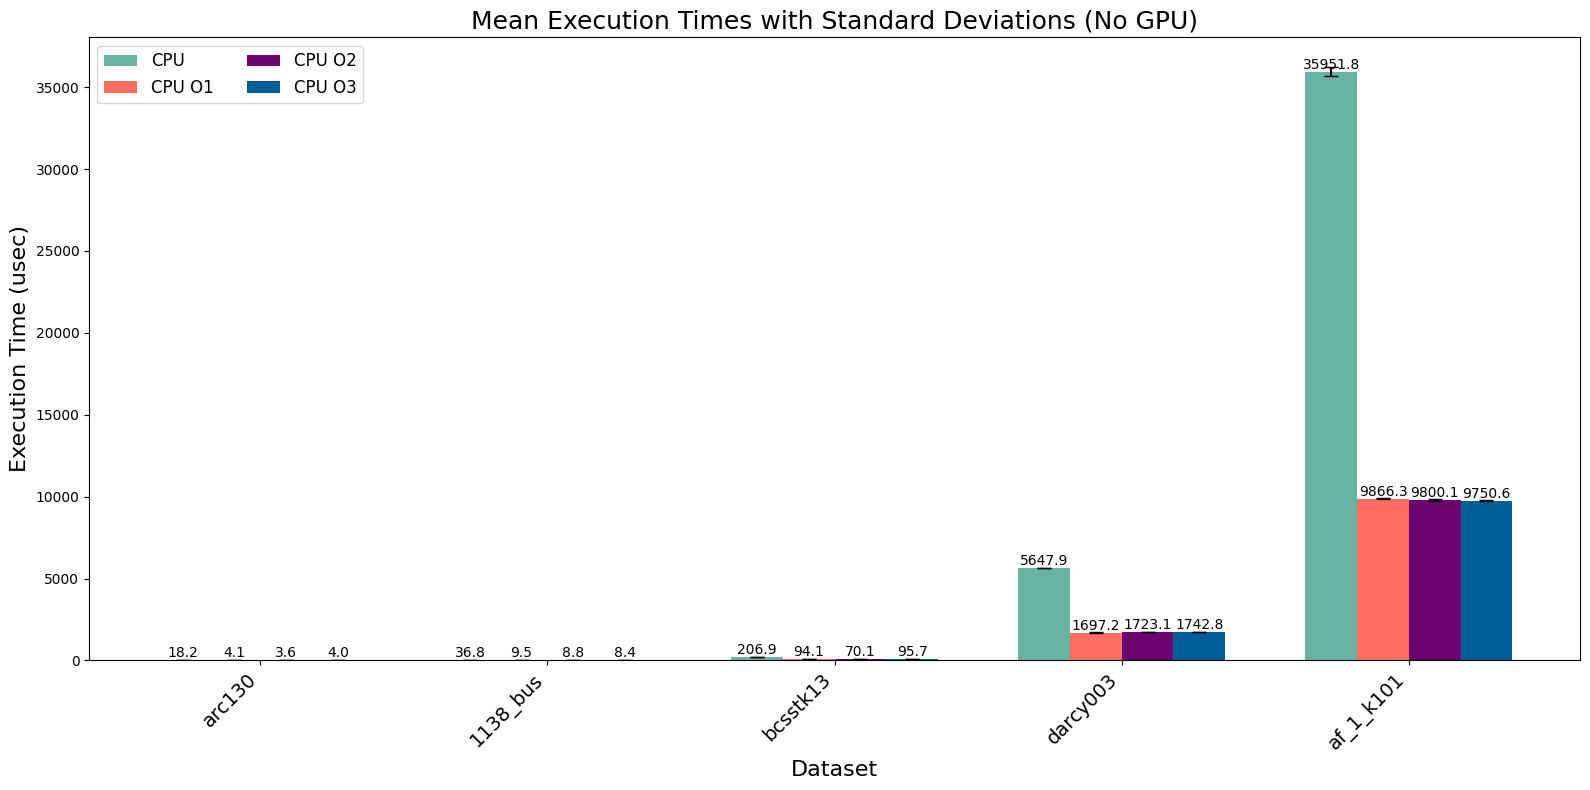

In [23]:
# Set up bar positions
x = np.arange(len(datasets))
width = 0.18  # Narrower for more groups

fig, ax = plt.subplots(figsize=(16, 8))

# Plot bars
bars1 = ax.bar(x - 1.5 * width, cpu_means, width, yerr=cpu_stds, capsize=5, label='CPU', color='#69b3a2')
bars2 = ax.bar(x - 0.5 * width, cpu_o1_means, width, yerr=cpu_o1_stds, capsize=5, label='CPU O1', color='#ff6f61')
bars3 = ax.bar(x + 0.5 * width, cpu_o2_means, width, yerr=cpu_o2_stds, capsize=5, label='CPU O2', color='#6a0572')
bars4 = ax.bar(x + 1.5 * width, cpu_o3_means, width, yerr=cpu_o3_stds, capsize=5, label='CPU O3', color='#005f99')

# Add titles and labels
ax.set_title("Mean Execution Times with Standard Deviations (No GPU)", fontsize=18)
ax.set_xlabel("Dataset", fontsize=16)
ax.set_ylabel("Execution Time (usec)", fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(datasets, rotation=45, ha="right", fontsize=14)
ax.legend(fontsize=12, ncol=2)

# Add value labels
for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval, f"{yval:.1f}", ha='center', va='bottom', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

# Chart

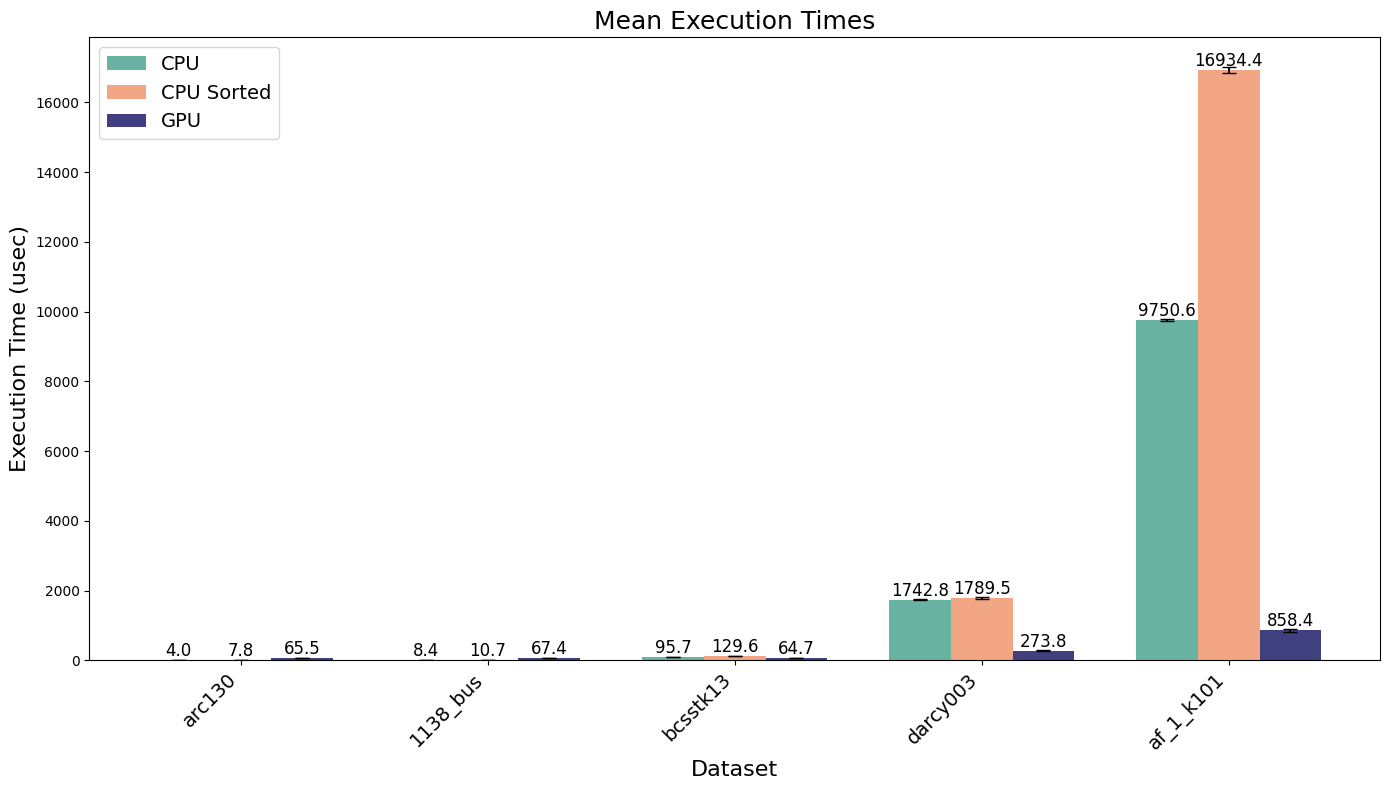

In [13]:
# Set up bar positions
x = np.arange(len(datasets))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))

# Plot bars
bars1 = ax.bar(x - width, cpu_o3_means, width, yerr=cpu_o3_stds, capsize=5, label='CPU', color='#69b3a2')
bars2 = ax.bar(x, cpu_o3_sorted_means, width, yerr=cpu_o3_sorted_stds, capsize=5, label='CPU Sorted', color='#f3a683')
bars3 = ax.bar(x + width, gpu_means, width, yerr=gpu_stds, capsize=5, label='GPU', color='#404080')

# Add titles and labels
ax.set_title("Mean Execution Times", fontsize=18)
ax.set_xlabel("Dataset", fontsize=16)
ax.set_ylabel("Execution Time (usec)", fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(datasets, rotation=45, ha="right", fontsize=14)
ax.legend(fontsize=14)

# Add value labels
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval, f"{yval:.1f}", ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# Bandwidth

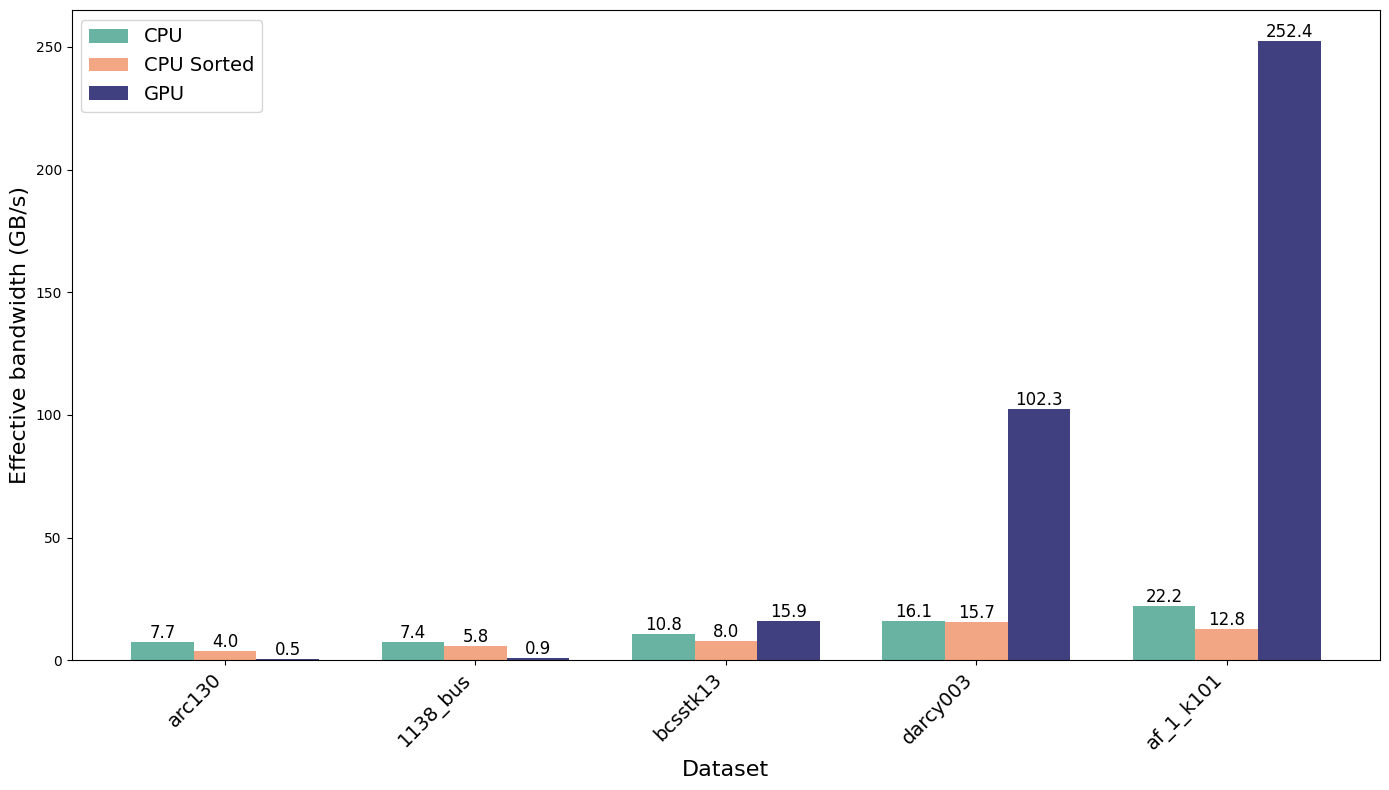

In [ ]:
bytes_rw = 24

bytes_total = [el * bytes_rw for el in nnz]

flops_cpu = [b / t / 1000 for b, t in zip(bytes_total, cpu_o3_means)]
flops_cpu_sorted = [b / t / 1000 for b, t in zip(bytes_total, cpu_o3_sorted_means)]
flops_gpu = [b / t / 1000 for b, t in zip(bytes_total, gpu_means)]

# Set up bar positions
x = np.arange(len(datasets))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))

# Plot bars
bars1 = ax.bar(x - width, flops_cpu, width, label='CPU', color='#69b3a2')
bars2 = ax.bar(x, flops_cpu_sorted, width, label='CPU Sorted', color='#f3a683')
bars3 = ax.bar(x + width, flops_gpu, width, label='GPU', color='#404080')

# Add titles and labels
# ax.set_title("Effective bandwidth", fontsize=18)
ax.set_xlabel("Dataset", fontsize=16)
ax.set_ylabel("Effective bandwidth (GB/s)", fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(datasets, rotation=45, ha="right", fontsize=14)
ax.legend(fontsize=14)

# Add value labels
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval, f"{yval:.1f}", ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# FLOPS

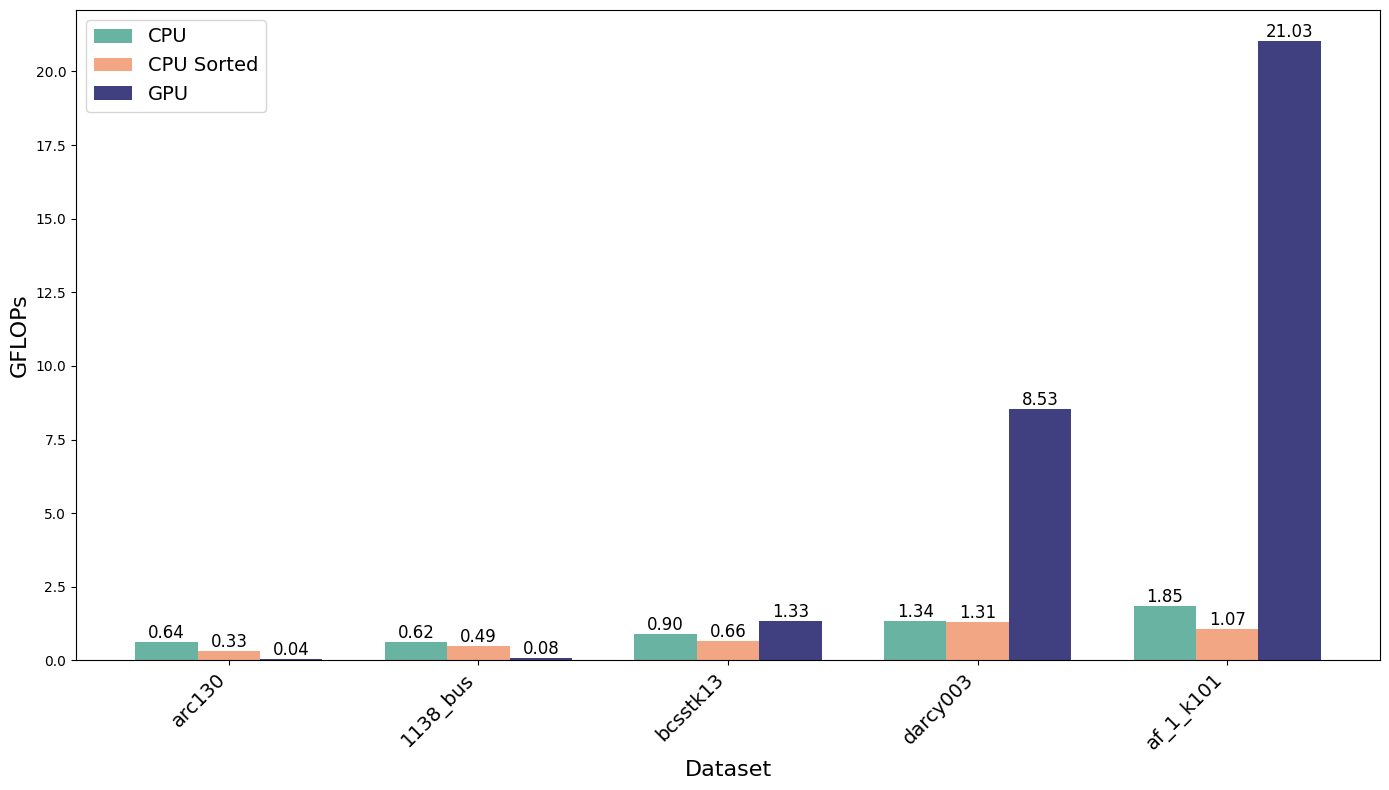

In [25]:
operations = 2

op_total = [el * operations for el in nnz]

flops_cpu = [o / t / 1000 for o, t in zip(op_total, cpu_o3_means)]
flops_cpu_sorted = [o / t / 1000 for o, t in zip(op_total, cpu_o3_sorted_means)]
flops_gpu = [o / t / 1000 for o, t in zip(op_total, gpu_means)]

# Set up bar positions
x = np.arange(len(datasets))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))

# Plot bars
bars1 = ax.bar(x - width, flops_cpu, width, label='CPU', color='#69b3a2')
bars2 = ax.bar(x, flops_cpu_sorted, width, label='CPU Sorted', color='#f3a683')
bars3 = ax.bar(x + width, flops_gpu, width, label='GPU', color='#404080')

# Add titles and labels
# ax.set_title("Effective bandwidth", fontsize=18)
ax.set_xlabel("Dataset", fontsize=16)
ax.set_ylabel("GFLOPs", fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(datasets, rotation=45, ha="right", fontsize=14)
ax.legend(fontsize=14)

# Add value labels
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval, f"{yval:.2f}", ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()